In [1]:
import numpy as np
from scipy.stats import multivariate_normal
from scipy.special import logsumexp
import matplotlib.pyplot as plt
from scipy.integrate import quad

# **1) GENERATION DES DONNEES**

In [35]:
def generate_z(K,x_data):
    z_O = []
    z_E = []
    for i in range(int(2**K)):
        z_O.append(np.random.multivariate_normal(x_data, (2/3)*np.identity(20)))
        z_E.append(np.random.multivariate_normal(x_data, (2/3)*np.identity(20)))
    z = z_O.copy()
    z.extend(z_E)
    return z, z_O, z_E

In [36]:
def generate_q_p(K,mean,x_data,z,z_O,z_E):
    q = []
    p = []
    q_O = []
    p_O = []
    q_E = []
    p_E = []
    for i in range(int(2**(K+1))):
        q.append(multivariate_normal.pdf(z[i], mean=x_data, cov=(2/3)*np.identity(20)))
        p.append(multivariate_normal.pdf(z[i], mean=mean, cov=np.identity(20))*multivariate_normal.pdf(x_data, mean=z[i], cov=np.identity(20)))
    for i in range(int(2**(K))):
        q_O.append(multivariate_normal.pdf(z_O[i], mean=x_data, cov=(2/3)*np.identity(20)))
        p_O.append(multivariate_normal.pdf(z_O[i], mean=mean, cov=np.identity(20))*multivariate_normal.pdf(x_data, mean=z_O[i], cov=np.identity(20)))
        q_E.append(multivariate_normal.pdf(z_E[i], mean=x_data, cov=(2/3)*np.identity(20)))
        p_E.append(multivariate_normal.pdf(z_E[i], mean=mean, cov=np.identity(20))*multivariate_normal.pdf(x_data, mean=z_E[i], cov=np.identity(20)))
    return q, p, q_O, p_O, q_E, p_E

In [4]:
#x = np.random.multivariate_normal(np.zeros(20), 2*np.identity(20))
#z, z_O, z_E = generate_z(5,x)
#q, p, q_O, p_O, q_E, p_E = generate_q_p(5,np.zeros(20),x,z,z_O,z_E)
#w = np.log(p) - np.log(q)

# **2) FONCTIONS**

In [38]:
def sum_w(k,w):
    sum_w=0
    for i in range(k):
        sum_w += np.exp(w[i])
    return sum_w

In [37]:
def iwae(n_sim,k,mean,x_data,theta):
    iwae=[]
    for i in range(n_sim):
        log_sum=0
        z, z_O, z_E = generate_z(k,x_data)
        q, p, q_O, p_O, q_E, p_E = generate_q_p(k,mean,x_data,z,z_O,z_E)
        w = np.log(p) - np.log(q)
        log_sum = np.log(sum_w(k,w))-np.log(k)
        iwae.append(log_sum)
    return np.mean(iwae)

# **3) FONCTION POUR PLOT LA LIKELIHOOD ESTIMEE**

In [48]:
def plot_iwae(debut, fin, pas, n_sim, x_data):
    for i in range(n_sim):
        liste = np.linspace(debut,fin,pas)
        x = []
        y = []
        for k in liste:
            y.append(iwae(n_sim=10, k=5, mean=np.zeros(20)+k, x_data=x_data, theta=theta))
            x.append(k)
        print(str('{:.2f}'.format((i+1)/n_sim)))              
    return x, y

Theta = 0.11
0.33
0.67
1.00


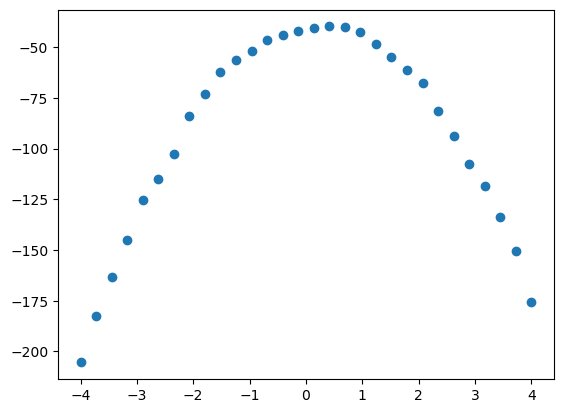

In [49]:
theta = np.random.normal(0,1)
print("Theta = " + str('{:.2f}'.format((theta))))
x_data = np.random.multivariate_normal(np.zeros(20)+theta, 2*np.identity(20))
x_iwae, y_iwae = plot_iwae(debut=-4, fin=4, pas=30, n_sim=3, x_data=x_data)
plt.scatter(x_iwae,y_iwae)

In [50]:
def calcul_likelihood(x,theta):
  cste = (2*np.pi)**(-len(x)/2)*1/(np.sqrt(np.linalg.det(2*np.identity(20))))
  somme = 0
  for i in range(len(x)):
    somme += (x[i] - theta)**2
  return cste*np.exp(-somme/4)

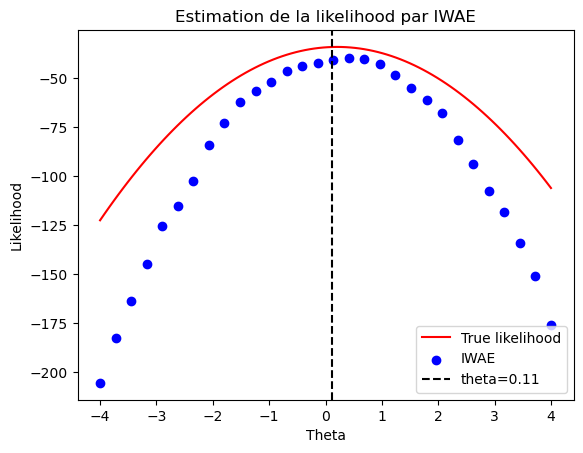

In [51]:
theta_range = np.linspace(-4, 4, 100)  
likelihood_values = [np.log(calcul_likelihood(x_data, theta)) for theta in theta_range]  

plt.plot(theta_range, likelihood_values, color='r', label='True likelihood')  
plt.scatter(x_iwae,y_iwae, color='b', label='IWAE')
plt.axvline(x=theta, color='black', linestyle='--', label='theta='+ str('{:.2f}'.format(theta)))
plt.xlabel('Theta')
plt.ylabel('Likelihood')
plt.title('Estimation de la likelihood par IWAE')
plt.legend(loc='best')
plt.show()  